# Making Complex Decisions
This notebook serves as supporting material for topics covered in **Lecture 12 - Rational
Decisions Over Time** from the lecture Grundlagen der Künstlichen Intelligenz (IN2062). This notebook uses implementations from [mdp.py](https://github.com/aimacode/aima-python/blob/master/mdp.py) module. Let's start by importing everything from the mdp module.

In [ ]:
from mdp import *
from notebook import psource, pseudocode, plot_pomdp_utility

## How to use this notebook
Clone the aima-python repository to your local machine, and add this notebook **directly** to the root directory of aima-python in order to make the following imports work.

There is also a bigger notebook, *mdp.ipynb*, in the same root directory, which contains more examples from the book *Artificial Intelligence: A Modern Approach*. 

## CONTENTS

* Overview
* MDP
* Grid MDP
* Value Iteration
    * Value Iteration Visualization
* Policy Iteration

## OVERVIEW

Before we start playing with the actual implementations let us review a couple of things about MDPs.

- A stochastic process has the **Markov property** if the conditional probability distribution of future states of the process (conditional on both past and present states) depends only upon the present state, not on the sequence of events that preceded it.

    -- Source: [Wikipedia](https://en.wikipedia.org/wiki/Markov_property)

Let us also take a look at the definition from the lecture slide **7/42**.


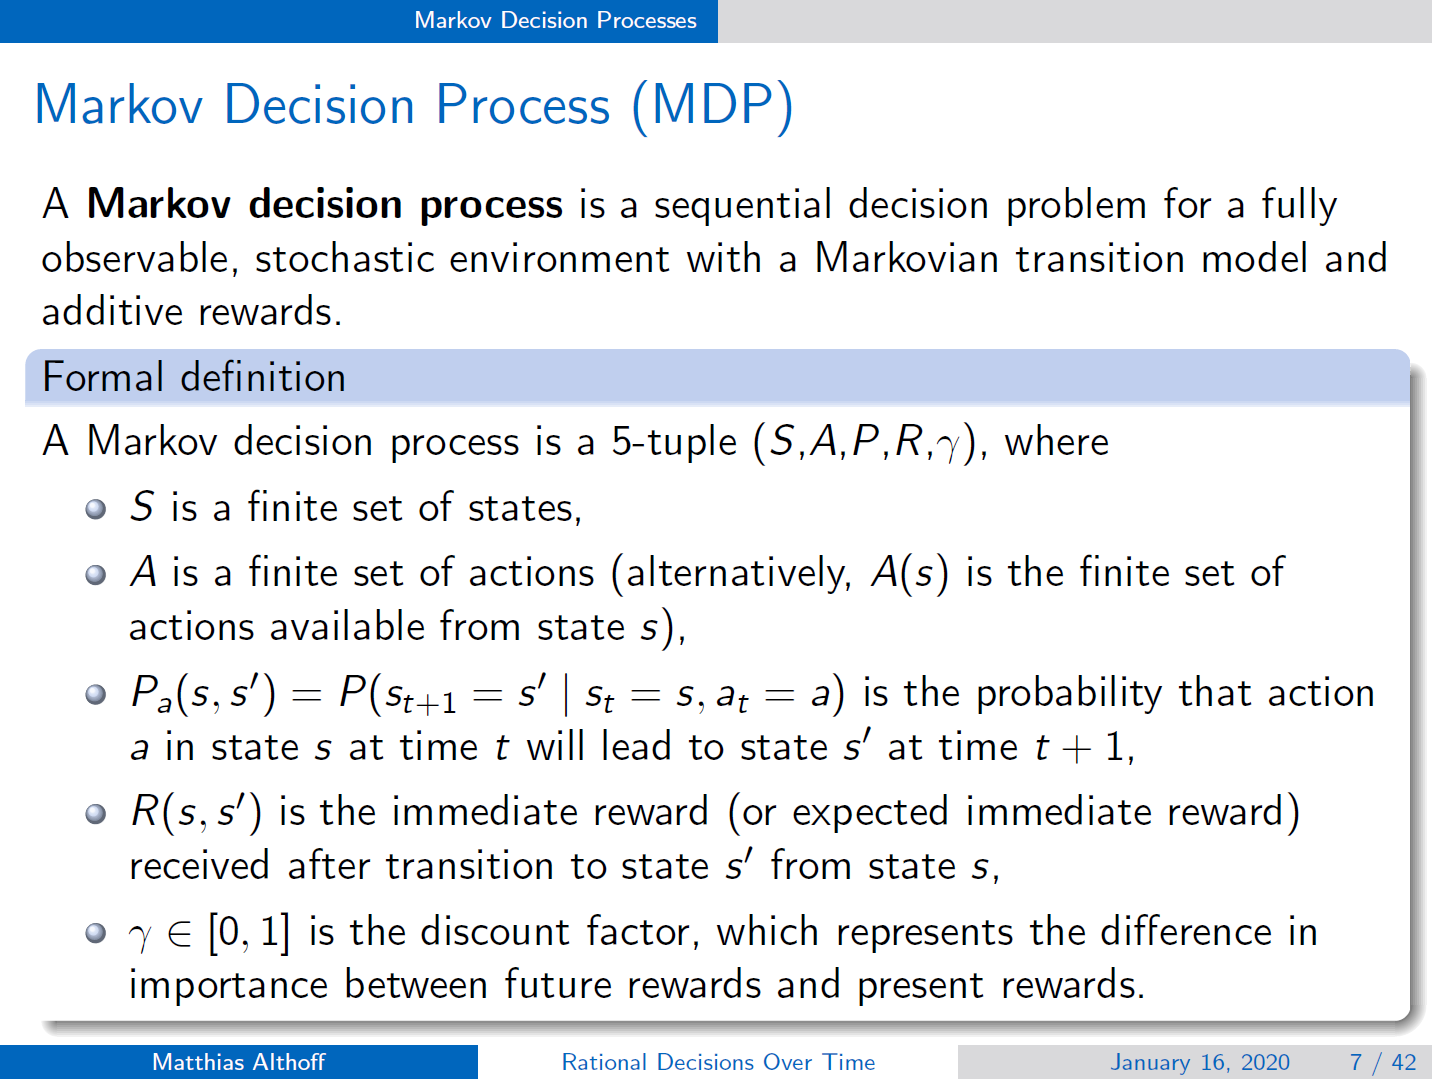

## MDP

To begin with let us look at the implementation of MDP class defined in mdp.py The comment section explains what all is required to define a MDP namely - **set of states**, **actions**, **initial state**, **transition model**, and **a reward function**. Each of these are implemented as methods. Do not close the pop-up so that you can follow along the description of code below.

In [ ]:
psource(MDP)

The **_ _init_ _** method expects following arguments:

- init: the initial state.
- actlist: List of actions possible in each state.
- terminals: List of terminal states where no possible action is left
- gamma: Discounting factor. This makes sure that delayed rewards have less value compared to immediate ones.

**R** method returns the reward for each state by using the self.reward dictionary.

**actions** method returns list of actions possible in each state. By default it returns all actions for states other than terminal states.



## GRID MDP

Now we look at a concrete implementation that makes use of the MDP as base class. The GridMDP class in the mdp module is used to represent a grid world MDP like **the roomba example** from the lecture slide **6/42** and **exercise 11.1**. We assume for now that the environment is _fully observable_, so that the agent always knows where it is. 

In [ ]:
psource(GridMDP)

The **_ _init_ _** method takes **grid** as an extra parameter compared to the MDP class. The grid is a nested list of rewards in states.

**go** method returns the state by going in particular direction by using vector_add.

**actions** method returns list of actions possible in each state. By default it returns all actions for states other than terminal states.

**to_arrows** are used for representing the policy in a grid like format.


We can create a GridMDP for the roomba problem as follows:

In [ ]:
sequential_decision_environment = GridMDP([[-0.04, -0.04, -0.04, +1],
                                           [-0.04, None, -0.04, -1],
                                           [-0.04, -0.04, -0.04, -0.04]],
                                          terminals=[(3, 2), (3, 1)], gamma=1.0)

<div class="alert alert-info">
    <h3>Note</h3>
    <p>In the original mdp.ipynb of the aima repository, sequential_decision_environment is defined as a GridMDP with default value gamma=0.9. We change the gamma value to 1.0 to be consistent with the results of value iteration of the example in the lecture slide. </p> 
</div>

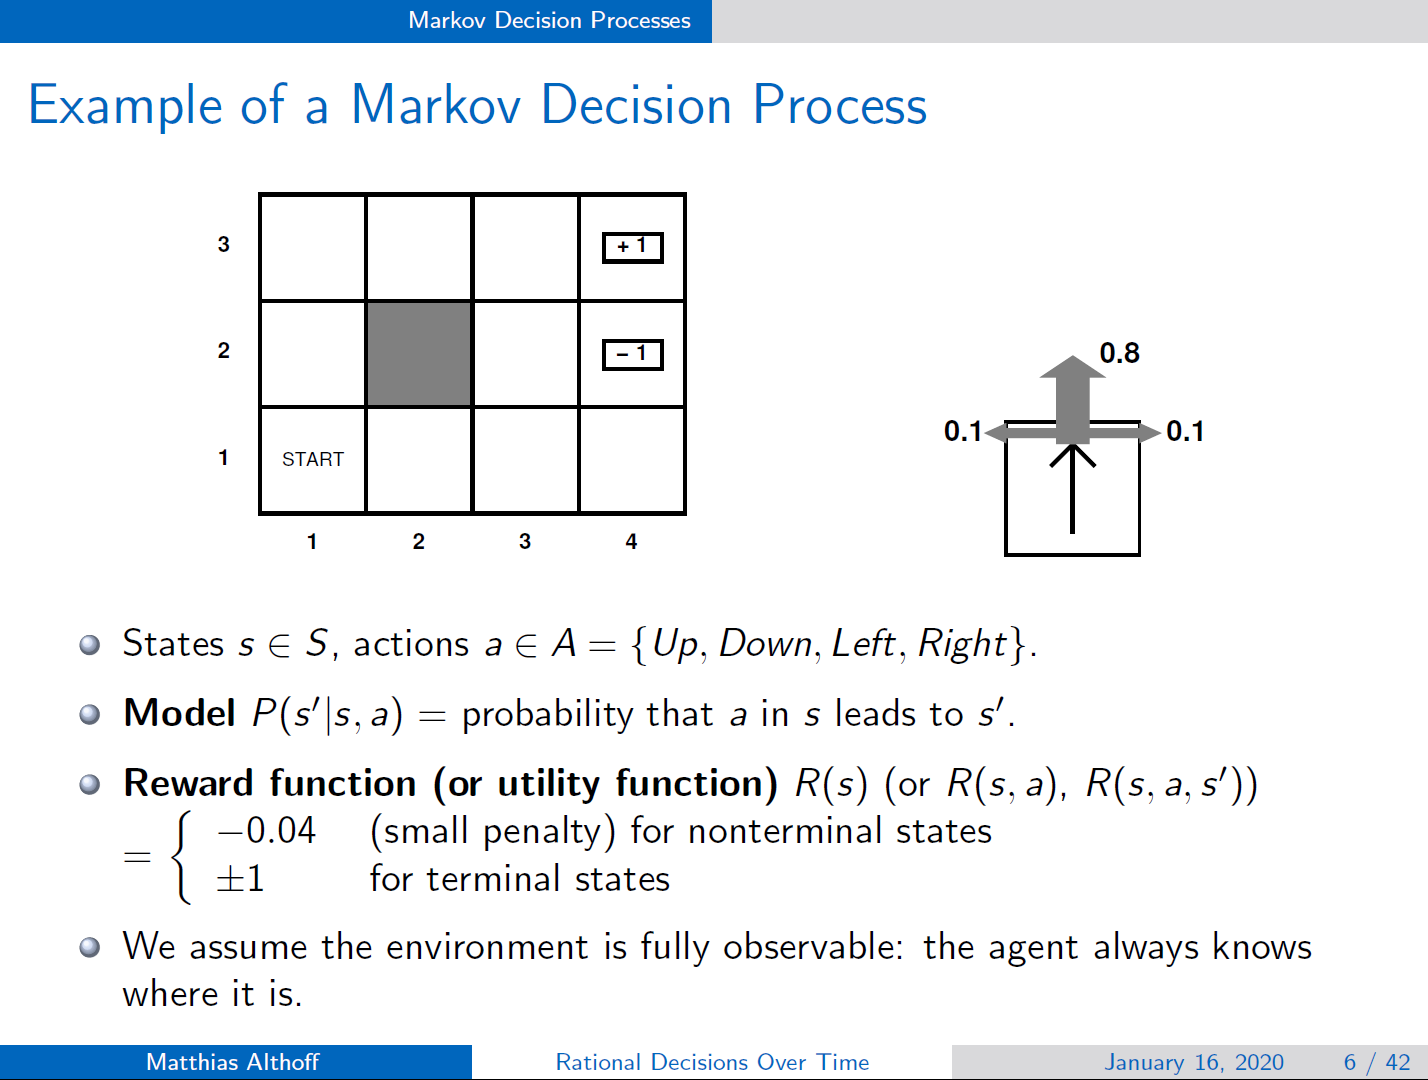

# VALUE ITERATION

Now that we have looked how to represent MDPs. Let's aim at solving them. Our ultimate goal is to obtain an optimal policy. We start with looking at Value Iteration and a visualization that should help us understanding it better.

We start by calculating Value/Utility for each of the states. The Value of each state is the expected sum of discounted future rewards given we start in that state and follow a particular policy $\pi$. The value or the utility of a state is given by the **Bellman Equation** from the lecture slide **18/42**.

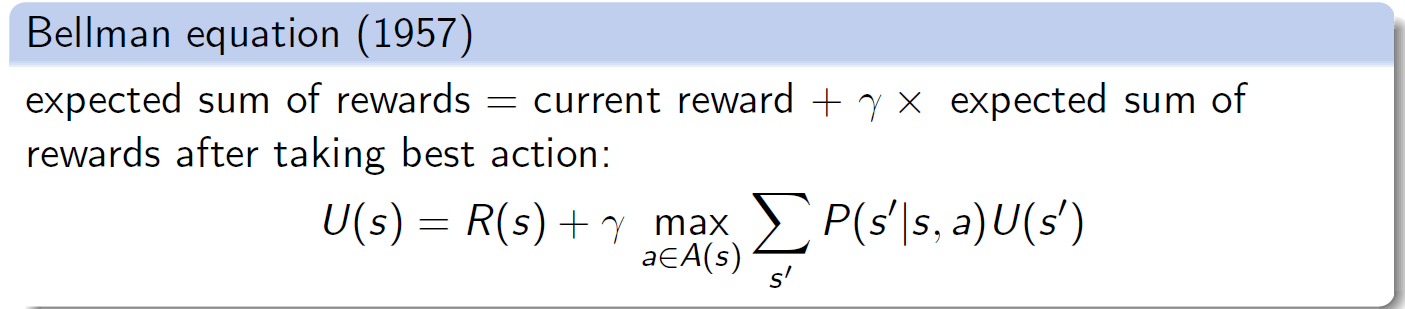

In [ ]:
psource(value_iteration)

## Value Iteration Algorithm

It takes as inputs two parameters, an MDP to solve and epsilon, the maximum error allowed in the utility of any state. It returns a dictionary containing utilities where the keys are the states and values represent utilities. 

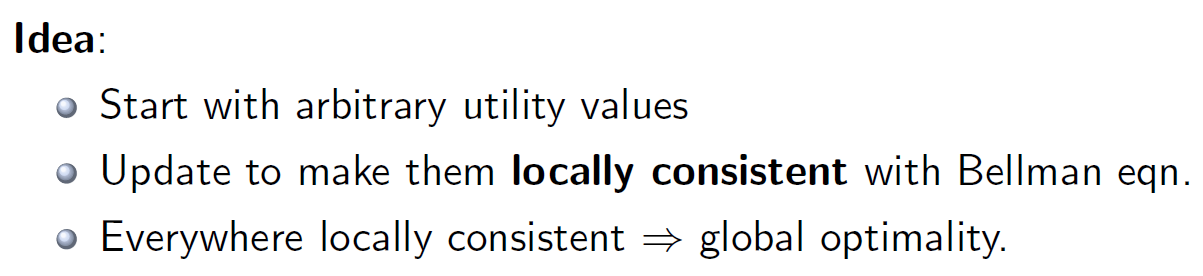

We start with arbitrary utility values and update them at each step, until we reach convergence, according to the following algorithm:

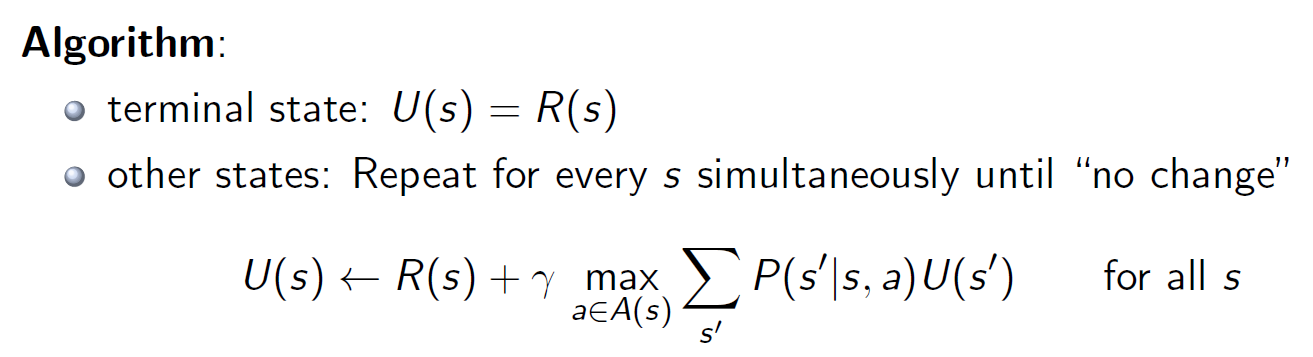

## Convergence of Value Iteration

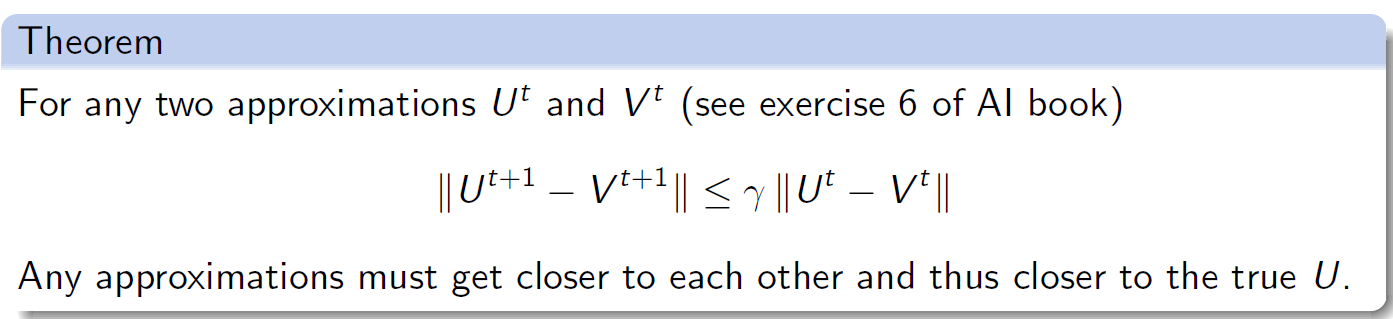

In order for our algorithm to stop updating the utility values of the states, we must reach a convergence. Refer to **Section 17.2.3** of the book for a detailed explanation. In the algorithm, we calculate a value $delta$ that measures the difference in the utilities of the current time step and the previous time step. This value of delta decreases as the values of $U_i$ converge.
We terminate the algorithm if the $\delta$ value is less than a threshold value determined by the hyperparameter _epsilon_.

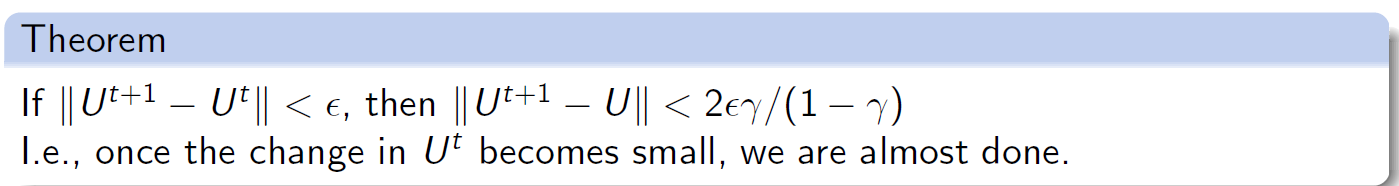



For now, let us solve the **sequential_decision_environment** GridMDP using `value_iteration`.

In [ ]:
value_iteration(sequential_decision_environment)

You can see the pseudo-code for this algorithm here:

In [ ]:
pseudocode("Value-Iteration")

## VALUE ITERATION VISUALIZATION

To illustrate that values propagate out of states let us create a simple visualization. We will be using a modified version of the value_iteration function which will store U over time. We will also remove the parameter epsilon and instead add the number of iterations we want.

In [ ]:
def value_iteration_instru(mdp, iterations=20):
    U_over_time = []
    U1 = {s: 0 for s in mdp.states}
    R, T, gamma = mdp.R, mdp.T, mdp.gamma
    for _ in range(iterations):
        U = U1.copy()
        for s in mdp.states:
            U1[s] = R(s) + gamma * max([sum([p * U[s1] for (p, s1) in T(s, a)])
                                        for a in mdp.actions(s)])
        U_over_time.append(U)
    return U_over_time

Next, we define a function to create the visualization from the utilities returned by **value_iteration_instru**. But you can ignore the upcoming code since it does not concern our actual topic.

In [ ]:
columns = 4
rows = 3
U_over_time = value_iteration_instru(sequential_decision_environment)

In [ ]:
%matplotlib inline
from notebook import make_plot_grid_step_function

plot_grid_step = make_plot_grid_step_function(columns, rows, U_over_time)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from notebook import make_visualize

iteration_slider = widgets.IntSlider(min=1, max=15, step=1, value=0)
w=widgets.interactive(plot_grid_step,iteration=iteration_slider)
display(w)

visualize_callback = make_visualize(iteration_slider)

visualize_button = widgets.ToggleButton(description = "Visualize", value = False)
time_select = widgets.ToggleButtons(description='Extra Delay:',options=['0', '0.1', '0.2', '0.5', '0.7', '1.0'])
a = widgets.interactive(visualize_callback, Visualize = visualize_button, time_step=time_select)
display(a)

Move the slider above to observe how the utility changes across iterations. It is also possible to move the slider using arrow keys or to jump to the value by directly editing the number with a double click. The **Visualize Button** will automatically animate the slider for you. The **Extra Delay Box** allows you to set time delay in seconds up to one second for each time step. You can see how the values converge with each step to the values in the lecture slide **14/42**.

# POLICY ITERATION

Let us take a look at the lecture slide **22/42** to remember what policy iteration is about. Since we do not need precise utility functions to determine best policy, policy iteration might come in handy.

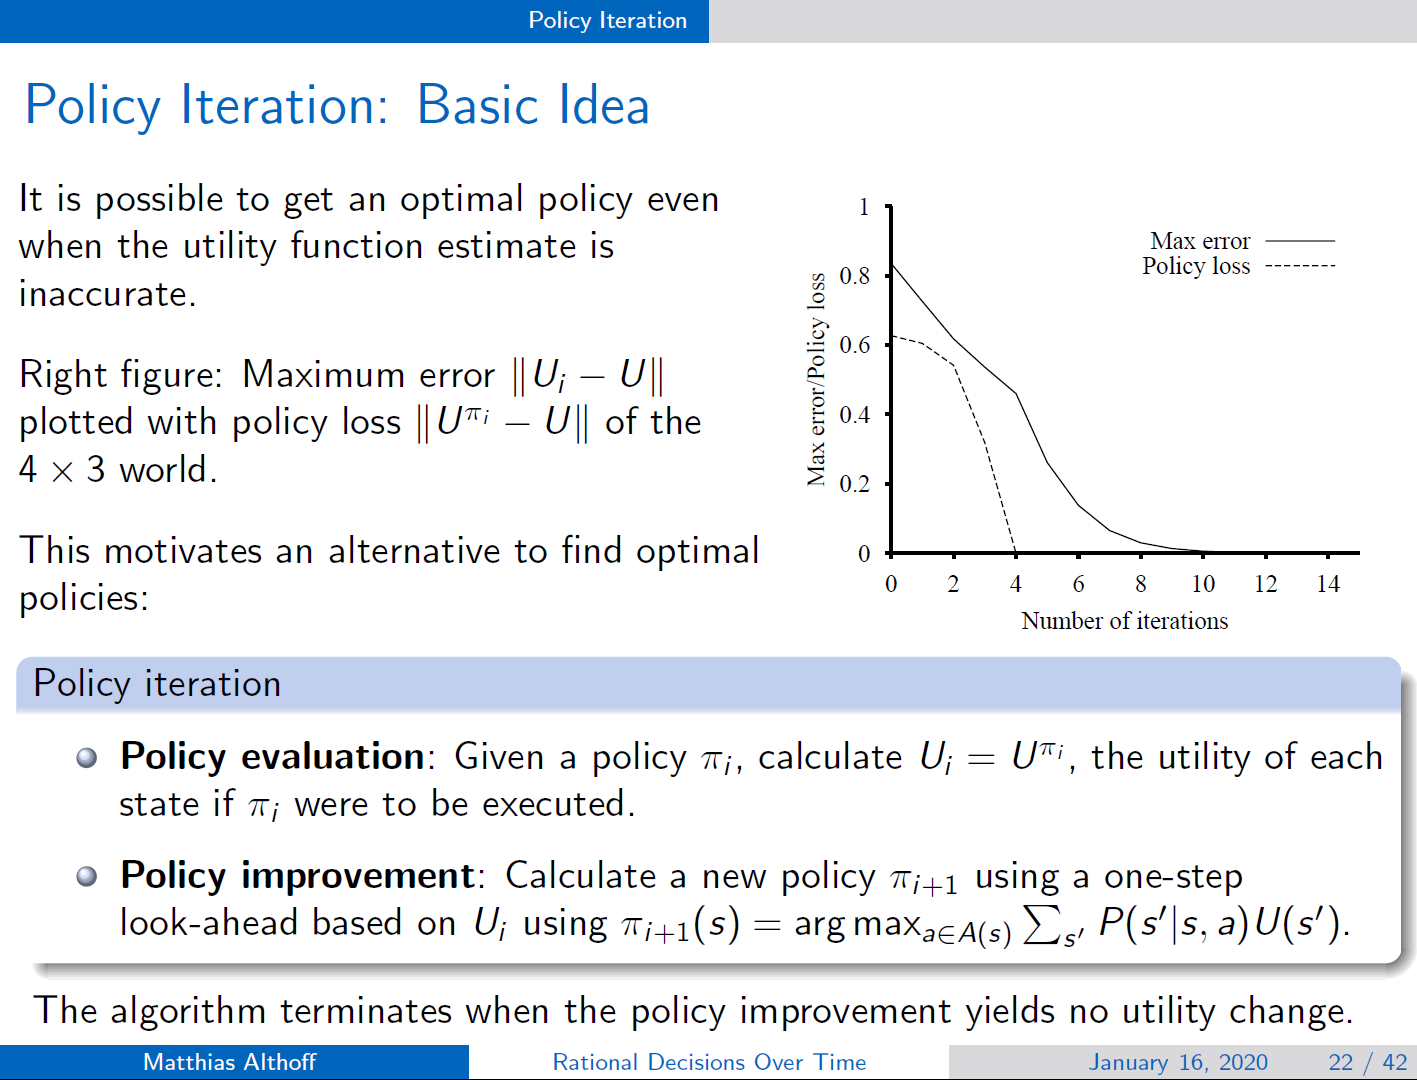

We now have a simplified version of the Bellman equation because the action of each state is already determined by the policy. Here is the simplified version of the Bellman Equation:

$$U_i(s) = R(s) + \gamma \sum_{s'}P(s'\ |\ s, \pi_i(s))U_i(s')$$


An important observation in this equation is that this equation doesn't have the `max` operator, which makes it linear.
For _n_ states, we have _n_ linear equations with _n_ unknowns, which can be solved exactly in time _**O(n&#179;)**_.
For more implementation details, have a look at **Section 17.3**.
Let us now look at how `policy_iteration` is implemented in mdp.py and the pseudo-code from the lecture slide **23/42.** You can compare them to better understand how policy iteration works.

In [ ]:
psource(expected_utility)

In [ ]:
psource(policy_iteration)

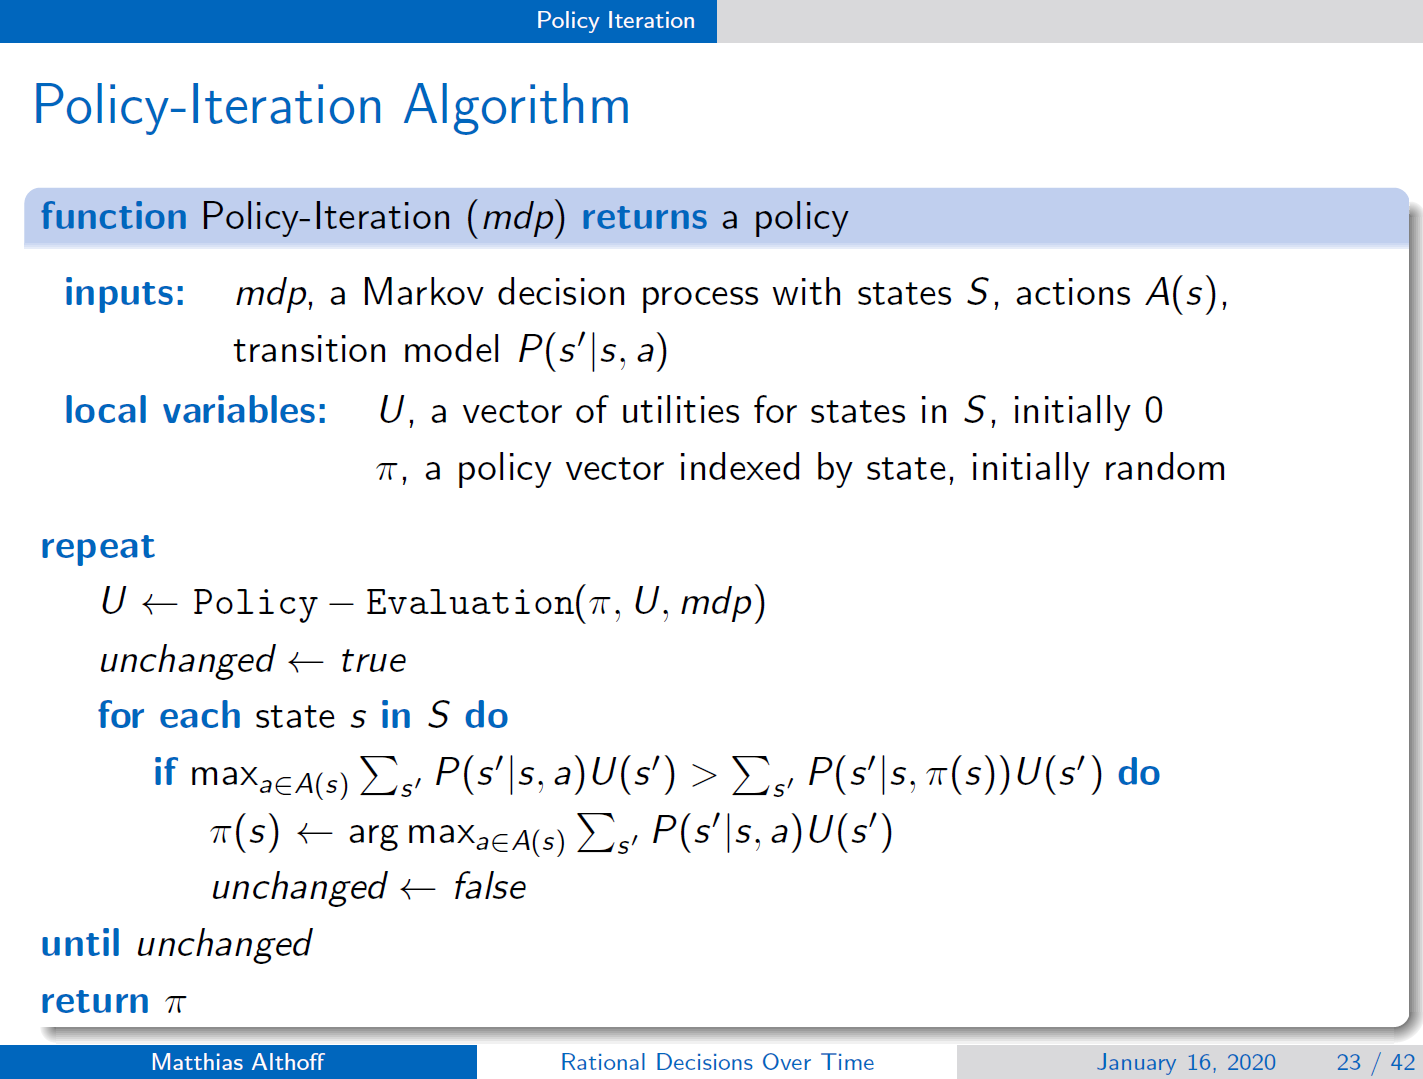

<br>Fortunately, it is not necessary to do _exact_ policy evaluation. 
The utilities can instead be reasonably approximated by performing some number of simplified value iteration steps.
The simplified Bellman update equation for the process is

$$U_{i+1}(s) \leftarrow R(s) + \gamma\sum_{s'}P(s'\ |\ s,\pi_i(s))U_{i}(s')$$

and this is repeated _k_ times to produce the next utility estimate. This is called _modified policy iteration_.

In [ ]:
psource(policy_evaluation)

Let us now solve our **`roomba example`** from lecture slide **8/42** using `policy_iteration`. (R(s) = -0.04, gamma = 1)
<br>(0, 1): up
<br>(0, -1): down
<br>(1, 0): right
<br>(-1, 0): left

In [ ]:
pseudocode('Policy-Iteration')

Now we show the policy iteration results of the four reward value cases in the lecture slide **11/42**.

### Case 1
---
**R(s) = -0.04** in all states except terminal states. We already define sequential_decision_environment with R(s) = -0.04 before.

In [ ]:
pi = policy_iteration(sequential_decision_environment)

We can now use the `to_arrows` method to see how our agent should pick its actions in the environment.

In [ ]:
from utils import print_table
print_table(sequential_decision_environment.to_arrows(pi))

This is exactly the output we expected
<br>
![title](images/-0.04.jpg)
<br>
Notice that, because the cost of taking a step is fairly small compared with the penalty for ending up in `(4, 2)` by accident, the optimal policy is conservative. 
In state `(3, 1)` it recommends taking the long way round, rather than taking the shorter way and risking getting a large negative reward of -1 in `(4, 2)`.

### Case 2
---
**R(s) = -0.4** in all states except terminal states

In [ ]:
sequential_decision_environment = GridMDP([[-0.4, -0.4, -0.4, +1],
                                           [-0.4, None, -0.4, -1],
                                           [-0.4, -0.4, -0.4, -0.4]],
                                          terminals=[(3, 2), (3, 1)], gamma=1.)

In [ ]:
pi = policy_iteration(sequential_decision_environment)
print_table(sequential_decision_environment.to_arrows(pi))

This is exactly the output we expected
![title](images/-0.4.jpg)

### Case 3
---
**R(s) = -4** in all states except terminal states

In [ ]:
sequential_decision_environment = GridMDP([[-4, -4, -4, +1],
                                           [-4, None, -4, -1],
                                           [-4, -4, -4, -4]],
                                          terminals=[(3, 2), (3, 1)], gamma=1.)

In [ ]:
pi = policy_iteration(sequential_decision_environment)
print_table(sequential_decision_environment.to_arrows(pi))

This is exactly the output we expected
![title](images/-4.jpg)

The living reward for each state is now lower than the least rewarding terminal. Life is so _painful_ that the agent heads for the nearest exit as even the worst exit is less painful than any living state.

### Case 4
---
**R(s) = -0.02** in all states except terminal states

In [ ]:
sequential_decision_environment = GridMDP([[-0.02, -0.02, -0.02, +1],
                                           [-0.02, None, -0.02, -1],
                                           [-0.02, -0.02, -0.02, -0.02]],
                                          terminals=[(3, 2), (3, 1)], gamma=1.)

In [ ]:
pi = policy_iteration(sequential_decision_environment)
print_table(sequential_decision_environment.to_arrows(pi))

This is exactly the output we expected
![title](reward_neg_0.02.png)